In [1]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import zipfile

In [2]:
file_directory = "/content/drive/MyDrive/flowers.zip"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
  print(f"Input directory :: {file_directory}")
  zipref = zipfile.ZipFile(file_directory, "r")
  zipref.extractall()
  zipref.close()


Input directory :: /content/drive/MyDrive/flowers.zip


In [5]:
train_dir = "/content/flowers/train"
valid_dir = "/content/flowers/valid"
test_dir  = "/content/flowers/test"
class_names = "/content/flowers/class_names.csv"

In [6]:
print(f"class_labels ::")
class_labels = pd.read_csv(class_names, index_col = "Index")["Flower name"]
print("  ",class_labels)

class_labels ::
   Index
1                  pink primrose
2      hard-leaved pocket orchid
3               canterbury bells
4                      sweet pea
5               english marigold
                 ...            
98               mexican petunia
99                      bromelia
100               blanket flower
101              trumpet creeper
102              blackberry lily
Name: Flower name, Length: 102, dtype: object


In [7]:
import zipfile
import pandas as pd
import os

def read_directory(path, class_labels):
    files = os.listdir(path)
    num_images_with_classlabels = {}
    num_images_with_indexes = {}

    for file in files:
      file_path = path + f"/{file}"
      number_of_images = len(os.listdir(file_path))
      num_images_with_indexes[class_labels[int(file)]] = number_of_images
      num_images_with_classlabels[file] = number_of_images

    print(f"  Number of images in each directory : {num_images_with_indexes}")
    print(f"  Number of images in each directory with class_labels: {num_images_with_classlabels}")

print(f"Train data ::")
read_directory(train_dir,class_labels)
print(f"Valid data ::")
read_directory(valid_dir,class_labels)
print(f"Test data ::")
read_directory(test_dir,class_labels)

Train data ::
  Number of images in each directory : {'pink primrose': 27, 'bougainvillea': 101, 'blanket flower': 35, 'hippeastrum': 59, 'californian poppy': 88, 'wild pansy': 67, 'bearded iris': 43, 'windflower': 46, 'snapdragon': 68, 'giant white arum lily': 46, 'yellow iris': 38, 'anthurium': 82, "colt's foot": 73, 'poinsettia': 73, 'peruvian lily': 65, 'daffodil': 49, 'petunia': 206, 'lotus lotus': 112, 'japanese anemone': 48, 'wallflower': 157, 'primula': 70, 'blackberry lily': 36, 'mallow': 54, 'prince of wales feathers': 36, 'bird of paradise': 70, 'foxglove': 132, 'watercress': 153, 'tree mallow': 48, 'globe thistle': 38, 'hibiscus': 104, 'alpine sea holly': 33, 'magnolia': 51, 'garden phlox': 36, 'globe-flower': 36, 'trumpet creeper': 49, 'bee balm': 53, 'clematis': 82, 'thorn apple': 95, 'ball moss': 34, 'red ginger': 35, 'canna lily': 66, 'carnation': 48, 'love in the mist': 31, 'sword lily': 100, 'marigold': 61, 'orange dahlia': 56, 'columbine': 66, 'water lily': 147, 'pin

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)

BATCH_SIZE = 32

train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = True
)
valid_data = valid_gen.flow_from_directory(
    valid_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = True
)
test_data = train_gen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = False
)

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


In [9]:
import matplotlib.pyplot as plt
import random


def display(image_generator):

  figure, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15,20))

  for  i in range(5):

    train_sample = image_generator.next()
    index = random.randint(0,len(train_sample[0]) -1 )
    axes[i].imshow(train_sample[0][index] * 1/255.)
    numeric_label =  [char for char in range(len(train_sample[1][index])) if train_sample[1][1][char] == 1.0][0]
    axes[i].set_title(class_labels[numeric_label])
  plt.show()
  plt.tight_layout()

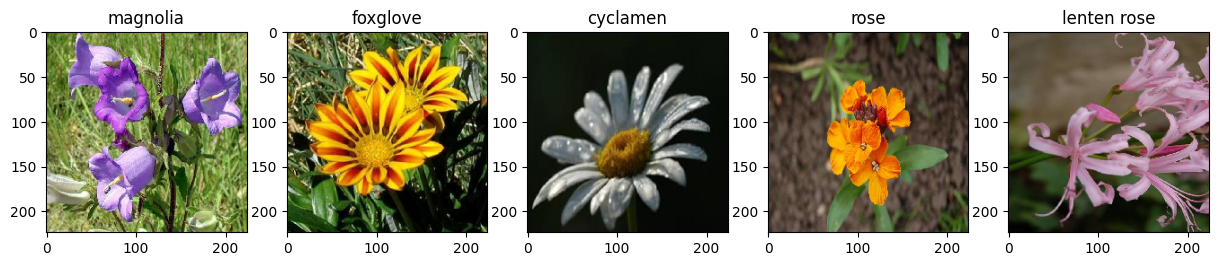

<Figure size 640x480 with 0 Axes>

In [10]:
display(train_data)

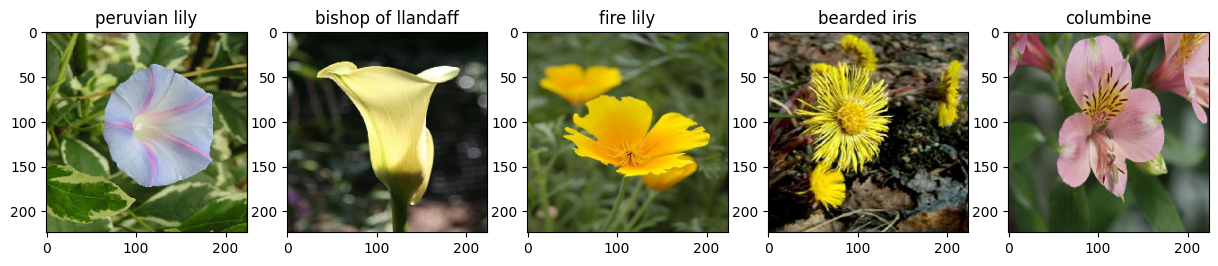

<Figure size 640x480 with 0 Axes>

In [11]:
display(valid_data)

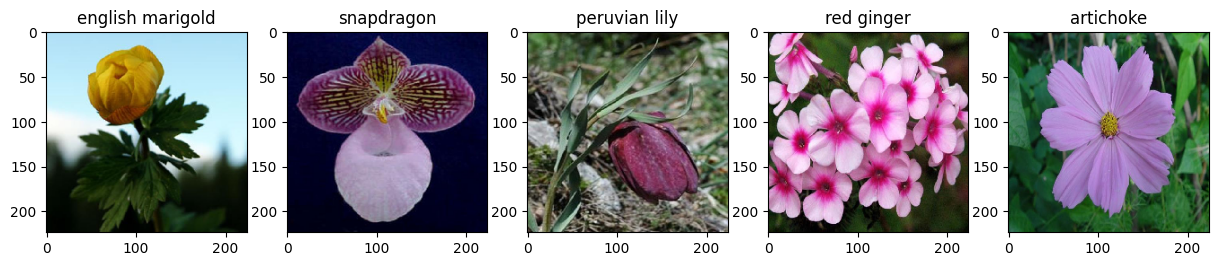

<Figure size 640x480 with 0 Axes>

In [13]:
display(test_data)

In [14]:
back_bone = tf.keras.applications.EfficientNetB7(include_top=False)
back_bone.trainable = False

258076736/258076736 [==============================] - 13s 0us/step


In [15]:
back_bone.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [17]:
data_augmentation = Sequential([
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.3),
      layers.RandomZoom(0.3),
      layers.RandomHeight(0.3),
      layers.RandomWidth(0.3),
],name = "data_augmentation")

In [18]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = back_bone(x, training=False)
x = tf.keras.layers.GlobalMaxPooling2D(name="max_pooling")(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(102, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 max_pooling (GlobalMaxPool  (None, 2560)              0         
 ing2D)                                                          
                                                                 
 output_layer (Dense)        (None, 102)               261222    
                                                             

In [20]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [21]:
def lr_schedule(epoch, lr):
    if epoch < 5:
        return 0.001
    elif epoch <= 20:
        return 0.0005
    else:
        return lr

In [22]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 5 ,
    restore_best_weights = True
)

In [24]:
intial_epoch = 20

In [25]:
tf.random.set_seed(42)

In [26]:
history_featureengineering = model.fit(train_data,
                    epochs=intial_epoch,
                    validation_data=valid_data,
                    validation_steps=len(valid_data),
                    callbacks = [early_stopping, lr_scheduler]
                    )

Epoch 1/20
205/205 [==============================] - 99s 374ms/step - loss: 3.5591 - accuracy: 0.3324 - val_loss: 2.0680 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 2/20
205/205 [==============================] - 70s 342ms/step - loss: 1.9186 - accuracy: 0.5685 - val_loss: 1.7938 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 3/20
205/205 [==============================] - 70s 340ms/step - loss: 1.4722 - accuracy: 0.6615 - val_loss: 1.8359 - val_accuracy: 0.6296 - lr: 0.0010
Epoch 4/20
205/205 [==============================] - 72s 353ms/step - loss: 1.3018 - accuracy: 0.6960 - val_loss: 1.3875 - val_accuracy: 0.6919 - lr: 0.0010
Epoch 5/20
205/205 [==============================] - 71s 344ms/step - loss: 1.2082 - accuracy: 0.7195 - val_loss: 1.4893 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 6/20
205/205 [==============================] - 72s 349ms/step - loss: 0.7115 - accuracy: 0.8085 - val_loss: 0.8492 - val_accuracy: 0.7861 - lr: 5.0000e-04
Epoch 7/20
205/205 [============================

In [27]:
history_featureengineering.history

{'loss': [3.559130907058716,
  1.918641448020935,
  1.4722154140472412,
  1.3018065690994263,
  1.2082101106643677,
  0.7114524841308594,
  0.6324326395988464,
  0.6167400479316711,
  0.6108009219169617,
  0.6194612979888916,
  0.5763473510742188,
  0.5491681694984436,
  0.5251774787902832,
  0.5336018204689026,
  0.504353940486908,
  0.5231577157974243,
  0.48684170842170715],
 'accuracy': [0.3324175775051117,
  0.5685287117958069,
  0.6614773869514465,
  0.6959707140922546,
  0.7194749712944031,
  0.8084554076194763,
  0.8246337175369263,
  0.8318070769309998,
  0.8385226130485535,
  0.8376068472862244,
  0.843406617641449,
  0.8427960872650146,
  0.8553113341331482,
  0.853327214717865,
  0.8545482158660889,
  0.858669102191925,
  0.870726466178894],
 'val_loss': [2.068011999130249,
  1.7937736511230469,
  1.8359078168869019,
  1.3875073194503784,
  1.4893308877944946,
  0.8491867780685425,
  0.832101583480835,
  0.7823814153671265,
  0.8014666438102722,
  0.7369434833526611,
  0.67

In [28]:
firstround_epochs = len(history_featureengineering.history["val_loss"])

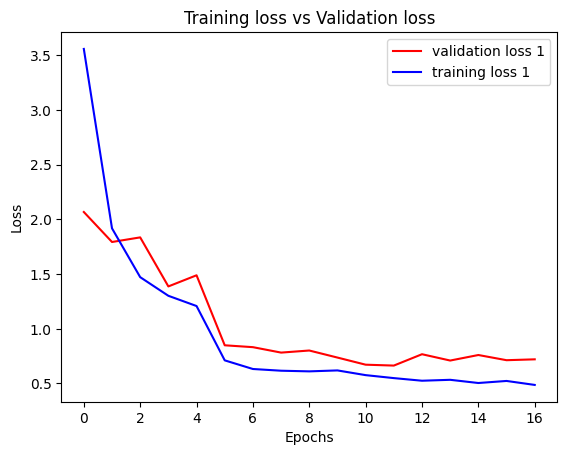

In [29]:
plt.plot(history_featureengineering.history["val_loss"], color = "r", label = "validation loss 1")
plt.plot(history_featureengineering.history["loss"], color = "b", label = "training loss 1")
plt.legend()
plt.title("Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

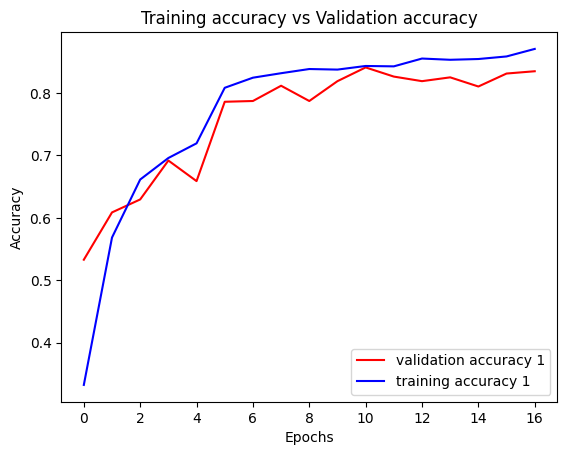

In [30]:
plt.plot(history_featureengineering.history["val_accuracy"], color = "r", label = "validation accuracy 1")
plt.plot(history_featureengineering.history["accuracy"], color = "b", label = "training accuracy 1")
plt.legend()
plt.title("Training accuracy vs Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 max_pooling (GlobalMaxPool  (None, 2560)              0         
 ing2D)                                                          
                                                                 
 output_layer (Dense)        (None, 102)               261222    
                                                             

In [32]:
back_bone.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [33]:
for layer_number, layer in enumerate( model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb7 False
3 max_pooling True
4 output_layer True


In [34]:
for layer_number, layer in enumerate( back_bone.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block1c_dwconv False
31 block1c_bn False
32 block1c_activation False
33 block1c_se_squeeze False
34 block1c_se_reshape False
35 block1c_se_reduce False
36 block1c_se_expand False
37 block1c_se_excite False
38 block1c_project_conv False
39 block1c_project_bn False
40

In [35]:
back_bone.trainable = True

In [36]:
number_of_unfreezelayers = 5

In [37]:
for layer in back_bone.layers[: - number_of_unfreezelayers]:
  layer.trainable = False

In [38]:
model.summary()for layer_number, layer in enumerate( model.layers):
  print(layer_number, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 max_pooling (GlobalMaxPool  (None, 2560)              0         
 ing2D)                                                          
                                                                 
 output_layer (Dense)        (None, 102)               261222    
                                                             

In [39]:
for layer_number, layer in enumerate( model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb7 True
3 max_pooling True
4 output_layer True


In [40]:
for layer_number, layer in enumerate( back_bone.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block1c_dwconv False
31 block1c_bn False
32 block1c_activation False
33 block1c_se_squeeze False
34 block1c_se_reshape False
35 block1c_se_reduce False
36 block1c_se_expand False
37 block1c_se_excite False
38 block1c_project_conv False
39 block1c_project_bn False
40

In [41]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

In [44]:
finetune_epochs = firstround_epochs + 10

In [45]:
history_finetuning = model.fit(train_data,
                    epochs = finetune_epochs,
                    initial_epoch = firstround_epochs ,
                    validation_data=valid_data,
                    validation_steps=len(valid_data),
                    callbacks = [early_stopping]
                    )

Epoch 18/27
205/205 [==============================] - 210s 1s/step - loss: 0.2077 - accuracy: 0.9422 - val_loss: 0.4445 - val_accuracy: 0.8851
Epoch 19/27
205/205 [==============================] - 200s 975ms/step - loss: 0.1846 - accuracy: 0.9455 - val_loss: 0.4421 - val_accuracy: 0.8973
Epoch 20/27
205/205 [==============================] - 180s 875ms/step - loss: 0.1829 - accuracy: 0.9457 - val_loss: 0.4157 - val_accuracy: 0.9022
Epoch 21/27
205/205 [==============================] - 189s 918ms/step - loss: 0.1726 - accuracy: 0.9480 - val_loss: 0.4274 - val_accuracy: 0.9010
Epoch 22/27
205/205 [==============================] - 171s 829ms/step - loss: 0.1646 - accuracy: 0.9487 - val_loss: 0.3937 - val_accuracy: 0.9108
Epoch 23/27
205/205 [==============================] - 174s 851ms/step - loss: 0.1448 - accuracy: 0.9580 - val_loss: 0.3895 - val_accuracy: 0.9181
Epoch 24/27
205/205 [==============================] - 162s 791ms/step - loss: 0.1347 - accuracy: 0.9600 - val_loss: 0.39

In [57]:
overall_traingloss = history_featureengineering.history["loss"] +  history_finetuning.history["loss"]
overall_valloss = history_featureengineering.history["val_loss"] +  history_finetuning.history["val_loss"]

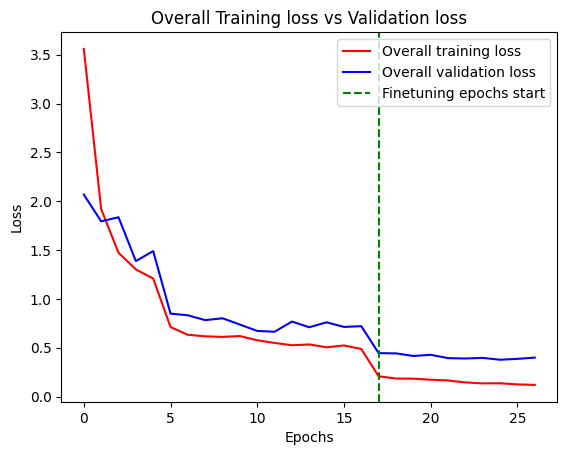

In [62]:
plt.plot(overall_traingloss, color = "r", label = "Overall training loss ")
plt.plot(overall_valloss, color = "b", label = "Overall validation loss ")
plt.axvline(x= firstround_epochs, color='g', linestyle='--', label = "Finetuning epochs start")
plt.legend()
plt.title("Overall Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [58]:
overall_traingaccuracy = history_featureengineering.history["accuracy"] +  history_finetuning.history["accuracy"]
overall_valaccuracy = history_featureengineering.history["val_accuracy"] +  history_finetuning.history["val_accuracy"]

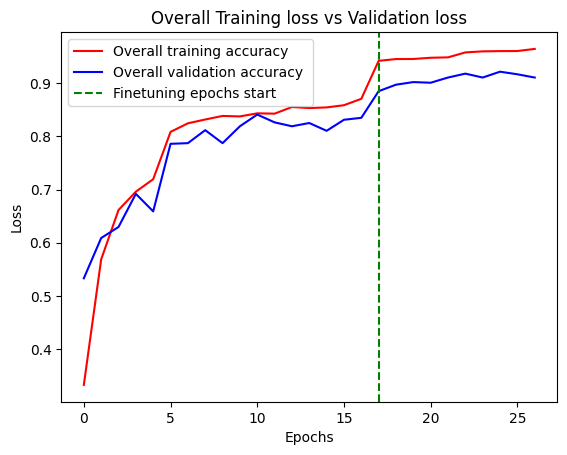

In [63]:
plt.plot(overall_traingaccuracy, color = "r", label = "Overall training accuracy ")
plt.plot(overall_valaccuracy, color = "b", label = "Overall validation accuracy ")
plt.axvline(x= firstround_epochs, color='g', linestyle='--', label = "Finetuning epochs start")
plt.legend()
plt.title("Overall Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [67]:
predicted_class_probs = model.predict(test_data)

26/26 [==============================] - 6s 217ms/step


In [68]:
pred_classes = predicted_class_probs.argmax(axis=1)

In [69]:
pred_classes[:5]

array([0, 0, 0, 0, 0])

In [87]:
y_test = test_data.classes

In [88]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy = accuracy_score( y_test, pred_classes)
print(f"Test Accuracy :: {accuracy}")

Test Accuracy :: 0.894993894993895


In [91]:
from sklearn.metrics import confusion_matrix

In [93]:
cm = confusion_matrix(y_test, pred_classes)

In [102]:
classes = [str(i) for i  in range(0, 102)]

In [106]:
import seaborn as sns
plt.figure(figsize=(100, 100))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
